# Using Renderer and Symbol Dataclasses

In [4]:
from arcgis.gis import GIS
from arcgis.map import Map, renderers, symbols

In [5]:
gis = GIS(profile="your_online_profile")

## Why Dataclasses?

In our ongoing commitment to providing a seamless and user-friendly API experience, we're excited to introduce Pydantic dataclasses into our system. Pydantic, a powerful data validation and parsing library, enhances the way you interact with our API by bringing a myriad of benefits to the table.

__Simplified Input Validation:__
Pydantic dataclasses allow us to effortlessly validate and parse incoming data. By defining the structure of your data using Pydantic models, we ensure that input adheres to the specified format, reducing the risk of errors and enhancing the reliability of your API interactions.

__Robust Type Hinting:__
Harness the power of Pydantic's type hinting capabilities to catch potential errors early in the development process. With well-defined data models, you benefit from improved code introspection, better IDE support, and increased confidence in the correctness of your code.

### Creating a Simple Renderer

#### First let's see how these pydantic classes can help us understand where we went wrong

In [6]:
# let's see an example where the style is wrong!
renderer = renderers.SimpleRenderer(
    symbol=symbols.SimpleMarkerSymbolEsriSMS(
        style="circle", color=[255, 0, 0, 1], size=10
    )
)

ValidationError: 1 validation error for SimpleMarkerSymbolEsriSMS
style
  Input should be 'esriSMSCircle', 'esriSMSCross', 'esriSMSDiamond', 'esriSMSSquare', 'esriSMSTriangle' or 'esriSMSX' [type=enum, input_value='circle', input_type=str]
    For further information visit https://errors.pydantic.dev/2.8/v/enum

#### Thanks to the pydantic class we see that the type of 'style' is wrong and it tells us what this should be

In [7]:
renderer = renderers.SimpleRenderer(
    symbol=symbols.SimpleMarkerSymbolEsriSMS(
        style="esriSMSCircle", color=[0, 0, 255], size=3
    )
)
renderer

SimpleRenderer(authoring_info=None, description=None, label=None, rotation_expression=None, rotation_type=None, symbol=SimpleMarkerSymbolEsriSMS(angle=None, color=[0, 0, 255], outline=None, size=3, style='esriSMSCircle', type='esriSMS', xoffset=None, yoffset=None), type='simple', visual_variables=None)

#### Great we have successfully made an instance of this dataclass

In [8]:
# You can see this displayed as a dictionary with the `dict` method
renderer.dict()

{'symbol': {'color': [0, 0, 255],
  'size': 3,
  'style': 'esriSMSCircle',
  'type': 'esriSMS'},
 'type': 'simple'}

### Apply Renderer to Feature Layer on Map `add`

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
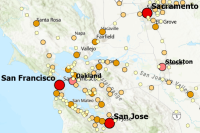

In [9]:
major_cities = gis.content.search(
    "USA major cities, owner:esri_dm", item_type="Feature Layer", outside_org=True
)[1]
major_cities

In [10]:
m = Map()
m

Map(extent={'xmin': -14954681.929724608, 'ymin': 3341779.8113346146, 'xmax': -12529809.39213255, 'ymax': 51799…

In [11]:
# change the basemap so we can see it better
m.basemap.basemap = "gray-vector"

In [12]:
# this will make the layer render with blue dots rather than the original red dots
m.content.add(major_cities.layers[0], drawing_info={"renderer": renderer.dict()})

In [13]:
m.zoom_to_layer(m.content.layers[0])

In [ ]:
### Update the color of the symbol